In [103]:
import os
cwd = os.getcwd()

import pandas as pd
import numpy as np
import string

test = pd.DataFrame(data = np.random.randint(0,2, (10,10)), index=[string.ascii_uppercase[:10]], columns = (string.ascii_uppercase[:10]))


TypeError: Index(...) must be called with a collection of some kind, 'ABCDEFGHIJ' was passed

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline


In [6]:
import requests

# Task: import table from TX state website, set index, rename columns, then save to xlsx
# 1. assign the webaddress to variable 'url'
url = 'https://www.sos.state.tx.us/elections/historical/march2022.shtml'

# 2. from the 'requests' package, use the .get() method on 'url', then .content, to extract the table
html = requests.get(url).content

# 3. create a variable named 'df_list', assign the pandas .read_html() function on the 'html' variable and set the index to 'County Name'
df_list = pd.read_html(html, index_col='County Name')

# 4. finish the import by assigning to variable 'df'
df = df_list[-1]

# 5. print the head of 'df' to make sure it looks correct
df.head()

,Precincts,Voter Registration,Suspense Voters,Non-Suspense Voters
County Name,,,,
ANDERSON,22,29128,2264,26864
ANDREWS,5,10212,1134,9078
ANGELINA,42,53073,5175,47898
ARANSAS,7,18239,2013,16226
ARCHER,14,6490,181,6309


In [8]:

# 6. Rename the index from 'County Name' to 'County' for better syntax
df.index.rename('County', inplace = True)

# 7. rename column names to more easily recalled assignments; remove whitespace
df.rename(columns = {'Voter Registration':'Registered', 'Suspense Voters':'Suspense', 'Non-Suspense Voters':'Non_suspense'}, inplace = True)

# 8. assign the file save location and filename as a string to the variable 'out_path' -- since '\' is used in python, use 'r' before the string so python recognizes the filepath as a real-string
out_path = r"C:\Users\Kristopher\OneDrive\Data\March 2022 Voter Registration Figures.xlsx"

# 9. export 'df' using the .to_excel() method, pass the 'out_path' variable -- this will create the file in the desired path and name it accordingly
df.to_excel(out_path)

In [2]:
sum([1,4],5)

10

# ***eCornell: CAC102*** - Writing Custom Python Functions, Classes, and Workflows

### *Functions:* Default and Keyword Arguments




In [8]:
def exceeds_threshold(value, threshold=0):
    if value > threshold:
        return True
    else:
        return False

In [13]:
exceeds_threshold(353)

True

In [14]:
exceeds_threshold(threshold=10,value=15)

True

In [18]:
import pandas as pd

help(pd.read_excel)

Help on function read_excel in module pandas.io.excel._base:

read_excel(io, sheet_name: 'str | int | list[IntStrT] | None' = 0, header: 'int | Sequence[int] | None' = 0, names=None, index_col: 'int | Sequence[int] | None' = None, usecols=None, squeeze: 'bool | None' = None, dtype: 'DtypeArg | None' = None, engine: "Literal['xlrd', 'openpyxl', 'odf', 'pyxlsb'] | None" = None, converters=None, true_values: 'Iterable[Hashable] | None' = None, false_values: 'Iterable[Hashable] | None' = None, skiprows: 'Sequence[int] | int | Callable[[int], object] | None' = None, nrows: 'int | None' = None, na_values=None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool' = False, parse_dates=False, date_parser=None, thousands: 'str | None' = None, decimal: 'str' = '.', comment: 'str | None' = None, skipfooter: 'int' = 0, convert_float: 'bool | None' = None, mangle_dupe_cols: 'bool' = True, storage_options: 'StorageOptions' = None) -> 'DataFrame | dict[IntStrT, DataFrame]'
    Rea

In [39]:
def file_naming(input_string):
    '''replaces all whitespace of the argument with underscores'''
    underscored = input_string.replace(' ','_')
    return underscored


In [43]:
file_naming('1  2  3')

'1__2__3'

In [27]:
import numpy as np

file_naming_test = pd.DataFrame(data=np.random.randint(0,2,(10,10)))
file_naming_test.to_csv(file_naming('test file delete me.csv'))

In [28]:
file_naming_test_recall = pd.read_csv(file_naming('test file delete me.csv'))

In [29]:
file_naming_test

,0,1,2,3,4,5,6,7,8,9
0,1,0,1,0,0,0,1,1,0,0
1,1,0,0,0,0,0,1,1,0,0
2,0,1,0,0,0,0,1,0,0,0
3,0,1,0,1,1,0,0,0,0,1
4,1,0,0,0,1,0,1,0,1,0
5,1,1,1,0,0,0,0,1,0,1
6,0,0,0,1,0,1,0,0,0,0
7,1,1,0,1,1,1,0,1,0,0
8,0,1,0,1,0,1,0,0,0,0
9,0,0,0,0,1,0,0,1,0,0


In [30]:
file_naming_test_recall

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9
0,0,1,0,1,0,0,0,1,1,0,0
1,1,1,0,0,0,0,0,1,1,0,0
2,2,0,1,0,0,0,0,1,0,0,0
3,3,0,1,0,1,1,0,0,0,0,1
4,4,1,0,0,0,1,0,1,0,1,0
5,5,1,1,1,0,0,0,0,1,0,1
6,6,0,0,0,1,0,1,0,0,0,0
7,7,1,1,0,1,1,1,0,1,0,0
8,8,0,1,0,1,0,1,0,0,0,0
9,9,0,0,0,0,1,0,0,1,0,0


#CAC102 - Writing Custom Python Functions, Classes, and Workflows
## Simple Ciphers With Lists and Dictionaries


In [48]:
# This block is taken from the Codio exercise 'Simple Ciphers With Lists and Dictionaries'
letters = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"
cipher = {letters[i]: letters[(i-3) % len(letters)] for i in range(len(letters))}

def transform_message(message, cipher):
    tmsg = ''
    for c in message:
        tmsg = tmsg + cipher.get(c,c)

    return tmsg

test = "I come to bury Caesar, not to praise him."

ttest = transform_message(test, cipher)
print(ttest)

decoder = {letters[i]: letters[(i+3) % len(letters)] for i in range(len(letters))}

decode_test = transform_message(ttest, decoder)
print(decode_test)

F Zljb ql Yrov zXbpXo, klq ql moXfpb efj.
I come to bury Caesar, not to praise him.


In [50]:
# This is an alternate version of the variable 'letters' that allows for all ascii characters
import string
letters2 = str(string.ascii_letters + string.whitespace + string.punctuation)
cipher2 = {letters2[i]: letters2[(i-3) % len(letters2)] for i in range(len(letters2))}

def transform_message(message, cipher):
    tmsg = ''
    for c in message:
        tmsg = tmsg + cipher.get(c,c)

    return tmsg

test = "I come to bury Caesar, not to praise him."

ttest2 = transform_message(test,cipher2)
print(ttest2)

decoder2 = {letters2[i]: letters2[(i+3) % len(letters2)] for i in range(len(letters2))}

decode_test2 = transform_message(ttest2,decoder2)
print(decode_test2)

FX~ljbXqlX}rovXz|bp|o)XklqXqlXmo|fpbXefj+
I come to bury Caesar, not to praise him.


In [51]:

class ShiftCipher:
    """
    ShiftCipher objects that can encrypt and decode text messages based on a specific shift length.
    """

    def __init__(self, shift):
        """
        Constructs a ShiftCipher for the specified degree of shift (positive or negative),
        by building a cipher (dictionary mapping from letters to other letters), and
        a decoder (the inverse of the cipher)
        """
        self.shift = shift
        self.letters = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"
        self.cipher = {self.letters[i]: self.letters[(i + (shift)) % len(self.letters)] for i in range(len(self.letters))}
        self.decoder = {self.letters[i]: self.letters[(i - (shift)) % len(self.letters)] for i in range(len(self.letters))}

    def transform_message(self, message, cipher):
        """
        Transforms a message using the specified cipher.  Is not called by users directly,
        and can be called with either the cipher (to encrypt) or the decoder (to decode).
        """
        tmsg = ''
        for c in message:
            tmsg = tmsg + cipher.get(c, c)
        return tmsg

    def encrypt(self, message):
        """
        Transforms a message using the cipher, by calling self.transform_message
        """
        return self.transform_message(message, self.cipher)

    def decode(self, message):
        """
        Transforms a message using the decoder, by calling self.transform_message
        """
        return self.transform_message(message, self.decoder)


test = "I come to bury Caesar, not to praise him."

In [52]:
ShiftCipher(13).encrypt(test)

'V pBzr GB oHEL PnrFnE, ABG GB CEnvFr uvz.'

In [57]:
test == ShiftCipher.decode(ShiftCipher.encrypt(cipher,test))

AttributeError: 'dict' object has no attribute 'transform_message'

The previous cell resulted in an <code>AttributeError</code> but I am incapable of understanding the reason why at this time. I have attempted to debug, but have not made any progress. I will have to review at another time.

# CAC102 - Writing Custom Python Functions, Classes, and Workflows

> ## Combining Python's Functions and Data Types for Custom Calculations
> The following cells are from the video lesson:

In [ ]:
# monthly expenses and revenues over course of year
expenses = [40000., 42500., 47000., 40500., 38000., 36000., 39500., 43000., 47000., 48500., 49000., 50000.]
revenues = [38000., 42500., 52000., 50000., 48000., 43000., 44500., 45000., 50000., 49500., 52000., 54000.]
monthly_gross = [revenues[i]-expenses[i] for i in range(12)]

def mean(x):
    """
    return the mean value of the elements in x
    by summing the elements and dividing by the length;
    if the input type does not support this,
    return the input itself
    """
    try:
        return sum(x)/len(x)
    except TypeError:
        return x

def compute_quarterly_figures(expenses, revenues):
    quarterlies = {}
    for quarter in [1,2,3,4]:
        start = (quarter - 1)*3
        end = start + 3
        total_expenses_qtr = sum(expenses[start:end])
        mean_expenses = mean(expenses[start:end])
        total_revenues_qtr = sum(revenues[start:end])
        mean_revenues = mean(revenues[start:end])
        total_gross_qtr = total_revenues_qtr - total_expenses_qtr
        summary = 'Q{}: rev = {:.2f}, exp = {:.2f}, gross = {:.2f}'
        summary_line = summary.format(
            quarter, mean_revenues, mean_expenses, total_gross_qtr)

        print(summary_line)

        quarterlies['Q{0}'.format(quarter)] = \
          (mean_revenues,mean_expenses, total_gross_qtr)
    return quarterlies

In [58]:
def compound(balance, rate, num_periods):
    print(0, round(balance,2))
    for n in range(1,num_periods+1):
        new_balance = round(balance * (1 + rate), 2)
        print(n, round(new_balance,2))

SyntaxError: Generator expression must be parenthesized (3862889295.py, line 2)

In [8]:
def compound_by_period(balance, rate, num_periods):
    yearly_balances = [balance]
    for n in range(1,num_periods+1):
        yearly_balances.append(round(yearly_balances[-1] * (1 + rate), 2))
    return yearly_balances
    for i, item, in enumerate(yearly_balances):
        print(i, item)

In [9]:
my_portfolio = compound_by_period(100,0.03,10)

In [11]:
my_portfolio

[100,
 103.0,
 106.09,
 109.27,
 112.55,
 115.93,
 119.41,
 122.99,
 126.68,
 130.48,
 134.39]

In [15]:
# First attempt copied from Codio - results in TypeError
def change_per_period(input_list):
    yearly_changes = input_list
    for i in range(len(input_list)+1):
        try:
            yearly_changes.append(input_list[i+1] - input_list[i])
        except IndexError:
            break
    return yearly_changes
    # for i, item in enumerate(yearly_changes):
    #     print(i, item)


In [16]:
change_per_period(my_portfolio)

[100,
 103.0,
 106.09,
 109.27,
 112.55,
 115.93,
 119.41,
 122.99,
 126.68,
 130.48,
 134.39,
 3.0,
 3.0900000000000034,
 3.1799999999999926,
 3.280000000000001,
 3.3800000000000097,
 3.4799999999999898,
 3.5799999999999983,
 3.690000000000012,
 3.799999999999983,
 3.9099999999999966,
 -131.39,
 0.09000000000000341,
 0.0899999999999892,
 0.10000000000000853,
 0.10000000000000853,
 0.0999999999999801,
 0.10000000000000853,
 0.11000000000001364,
 0.10999999999997101,
 0.11000000000001364,
 -135.29999999999998,
 131.48,
 -1.4210854715202004e-14,
 0.010000000000019327,
 0.0,
 -2.842170943040401e-14,
 2.842170943040401e-14,
 0.010000000000005116,
 -4.263256414560601e-14,
 4.263256414560601e-14,
 -135.41,
 266.78,
 -131.48000000000002,
 0.010000000000033538,
 -0.010000000000019327,
 -2.842170943040401e-14,
 5.684341886080802e-14,
 0.009999999999976694,
 -0.010000000000047748,
 8.526512829121202e-14,
 -135.41000000000003,
 402.18999999999994,
 -398.26,
 131.49000000000007,
 -0.02000000000005

In [1]:
def change_per_period(input_list):
    yearly_changes = []
    for i, item in enumerate(input_list):
        yearly_changes.append(item[i+1] - item[i])
    for i, item in enumerate(yearly_changes):
        print(i, item)


In [128]:
# This code block was copied from the Compound Interest assignment

balance = 100.0
rate = 0.03

# print(0, round(balance,2))
# for n in range(1,11):
#     balance = round(balance * (1 + rate), 2)
#     print(n, round(balance,2))

def compound(balance, rate, num_periods):
    print(0, round(balance,2))
    for n in range(1,num_periods+1):
        balance = round(balance * (1 + rate), 2)
        print(n, round(balance,2))

def compound_by_period(balance, rate, num_periods):
    yearly_balances = [balance]
    for n in range(1,num_periods+1):
        yearly_balances.append(round(yearly_balances[-1] * (1 + rate), 2))
    for i, item, in enumerate(yearly_balances):
        print(i, item)
    return yearly_balances

def change_per_period(input_list):
    yearly_changes = []
    list_len = len(input_list)-1
    for n in range(list_len):
        try:
            yearly_changes.append(input_list[n+1] - input_list[n])
        except IndexError:
            break
    # for item in yearly_changes:
    #     round(item,2)
    return yearly_changes

wheat = compound_by_period(1,1,63)
total_wheat = sum(wheat) # This was the updated expression suggested by Matthew Levine
#verify = total_wheat == 18446744073709551615
#print(f'''
#Total wheat on board = {total_wheat}

# Does total_wheat == T_63 (18446744073709551615)? {verify}''')

# # my total_wheat variable correctly matches the total listed on the Wiki page,
# # yet it is still being flagged as incorrect. I don't understand why.

0 1
1 2
2 4
3 8
4 16
5 32
6 64
7 128
8 256
9 512
10 1024
11 2048
12 4096
13 8192
14 16384
15 32768
16 65536
17 131072
18 262144
19 524288
20 1048576
21 2097152
22 4194304
23 8388608
24 16777216
25 33554432
26 67108864
27 134217728
28 268435456
29 536870912
30 1073741824
31 2147483648
32 4294967296
33 8589934592
34 17179869184
35 34359738368
36 68719476736
37 137438953472
38 274877906944
39 549755813888
40 1099511627776
41 2199023255552
42 4398046511104
43 8796093022208
44 17592186044416
45 35184372088832
46 70368744177664
47 140737488355328
48 281474976710656
49 562949953421312
50 1125899906842624
51 2251799813685248
52 4503599627370496
53 9007199254740992
54 18014398509481984
55 36028797018963968
56 72057594037927936
57 144115188075855872
58 288230376151711744
59 576460752303423488
60 1152921504606846976
61 2305843009213693952
62 4611686018427387904
63 9223372036854775808


In [17]:
import os
os.getcwd()

'C:\\Users\\Kristopher\\AppData\\Roaming\\JetBrains\\DataSpell2022.2\\scratches'

In [ ]:
import sys

# [CAC105] - Organizing Data with Python
## Reading Tables From a Relational Database - using SQL Alchemy
The following cell is copied from the instructional video:

```python
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine('sqlite://product_data.sqlite')
sales = pd.read_sql_query('SELECT * from sales', engine)
orders = pd.read_sql_query('SELECT * from orders', engine)
low_inventory = pd.read_sql_query('SELECT * from inventory where (Pencils < 200) or (Pens < 200) or (Erasers < 50) or (Paper < 300)', engine)
```

## Reading Data From a URL

In [1]:
import requests
response = requests.get("https://gbfs.citibikenyc.com/gbfs/en/station_information.json")

if response.status_code != 200:
    print("Error with website. If problem persists, contact your Facilitator!")
else:
    print("Data download successful")

Data download successful


In [2]:
datadict = response.json()
print(datadict.keys())
print(datadict['data'].keys())

dict_keys(['data', 'last_updated', 'ttl'])
dict_keys(['stations'])


In [3]:
print(datadict['last_updated'])
import time
print(time.ctime(datadict['last_updated']))

1662268326
Sun Sep  4 00:12:06 2022


In [4]:
datadict['data']['stations']

[{'legacy_id': '72',
  'region_id': '71',
  'lon': -73.99392888,
  'short_name': '6926.01',
  'rental_uris': {'android': 'https://bkn.lft.to/lastmile_qr_scan',
   'ios': 'https://bkn.lft.to/lastmile_qr_scan'},
  'name': 'W 52 St & 11 Ave',
  'lat': 40.76727216,
  'capacity': 32,
  'rental_methods': ['KEY', 'CREDITCARD'],
  'station_type': 'classic',
  'eightd_has_key_dispenser': False,
  'electric_bike_surcharge_waiver': False,
  'external_id': '66db237e-0aca-11e7-82f6-3863bb44ef7c',
  'station_id': '72',
  'eightd_station_services': [],
  'has_kiosk': True},
 {'legacy_id': '79',
  'region_id': '71',
  'lon': -74.00666661,
  'short_name': '5430.08',
  'rental_uris': {'android': 'https://bkn.lft.to/lastmile_qr_scan',
   'ios': 'https://bkn.lft.to/lastmile_qr_scan'},
  'name': 'Franklin St & W Broadway',
  'lat': 40.71911552,
  'capacity': 33,
  'rental_methods': ['KEY', 'CREDITCARD'],
  'station_type': 'classic',
  'eightd_has_key_dispenser': False,
  'electric_bike_surcharge_waiver': F

### Step 4.

In the code cell below, write and evaluate code to extract the latitude and longitude of every bike station, and store the result in a variable named ```coordinates```.  Store the data in a numpy array of shape (N,2), where N is the total number of stations, and 2 reflects the number of columns &mdash; store all the longitudes in the first column and all the latitudes in the second column.

Carry out this data extraction however you see fit.  The basic steps you will need to carry out are:

* import the numpy module
* loop over all the station entries in the list of dictionaries returned by ```datadict['data']['stations']```
* extract the 'lon' and 'lat' entries associated with each station
* build up a list of (lon, lat) pairs, one for each station
* convert the list of (lon, lat) pairs to a numpy array with two columns.

After importing numpy, the remaining set of steps above can be done in one line, using a list comprehension to extract the desired pair of fields from each station entry and then converting the list to a numpy array using the ```np.array``` function.  But if you'd rather break out each step separately within a ```for``` loop, that would work too.  When you are finished, you should have a numpy array with shape approximately equal to (1000, 2), since there should be approximately 1000 stations in the full array of coordinates (although that number can change over time as new stations are added or removed).  Print the shape of the array to determine how many stations are included in the dataset that you downloaded.


In [45]:
# Attempting to visualize the structure of datadict so I can correctly write a fucntion to extract 'lon' and 'lat'
        dict        dict    list    dict
datadict['data']['stations'][0]

-73.99392888

In [60]:
# first attempt at extraction
# resulted in AttributeError, will need some deep thinking about this
print( ['lon','lat'] for k,v in datadict['data']['stations'])

AttributeError: 'list' object has no attribute 'get'

In [80]:
# SUCCESS! This function works correctly. It took a few hours to code it correctly

def data_parse_list():
    test = []
    for i in datadict['data']['stations'][:]:
        test.append([i.get('lon'),i.get('lat')])

    return test


In [82]:
# Testing the data_parse_list() function

data_test = data_parse_list()
data_test

In [86]:
# SUCCESS AGAIN! This single-line comprehension does the same thing the data_parse_list() function does.

test2 = list([i.get('lon'),i.get('lat')] for i in datadict['data']['stations'][:])
test2

[[-73.99392888, 40.76727216],
 [-74.00666661, 40.71911552],
 [-74.00016545, 40.71117416],
 [-73.97632328, 40.68382604],
 [-74.00149746, 40.74177603],
 [-73.97803415, 40.69608941],
 [-73.95928168, 40.68676793],
 [-74.00674436, 40.73172428],
 [-74.00297088, 40.72710258],
 [-73.99337909, 40.69239502],
 [-73.98068914, 40.69839895],
 [-74.0091059, 40.71625008],
 [-73.98085795, 40.7208736],
 [-73.99724900722504, 40.722103786686034],
 [-74.00910627, 40.71473993],
 [-73.9816324043, 40.752062307],
 [-73.99612349, 40.69089272],
 [-73.99810231, 40.72917025],
 [-73.97032517, 40.75323098],
 [-73.99456405, 40.73971301],
 [-73.97738662, 40.7381765],
 [-74.00681753, 40.74334935],
 [-73.99548059, 40.70037867],
 [-73.99383605, 40.70277159],
 [-73.99994661, 40.73781509],
 [-74.00552427, 40.71146364],
 [-73.971878855, 40.7546011026],
 [-73.99379025, 40.72743423],
 [-73.99014892, 40.69597683],
 [-73.98713956, 40.7284186],
 [-74.00859207, 40.7361967],
 [-73.9813018, 40.69196566],
 [-73.97493121, 40.68981035

In [95]:
# Testing the correct creation of a NumPy array

test3 = np.array(list(([i.get('lon'),i.get('lat')] for i in datadict['data']['stations'][:])))
test3

In [97]:
# test cell for assignment, utilizes all steps. The resulting coordinates variable was tested as correct in the Codio Assignment Notebook

import numpy as np

# This was the original code I wrote on the evening of 9/3/2022, it was incorrect
#
# coordinates =  for datadict['data']['stations'] in datadict['data']:
#     for k, v in datadict['data']['stations'].iteritems():
#         return 'lon','lat'

# The following code is correct, written the morning of 9/4/2022

coordinates = np.array(list([i.get('lon'),i.get('lat')] for i in datadict['data']['stations'][:]))
coordinates

### Step 5.

Once you have extracted the coordinates, make a scatter plot of each location using ```plt.scatter``` (longitude on the x-axis, latitude on the y-axis) to get an approximate map of where all the stations are.  (Hint: you might want to make the dots smaller than the default size, by passing in an option such as ```s=3``` to reduce the marker size s, and you might want to first create an empty figure object with a square aspect ratio, e.g., ```plt.figure(figsize=(6,6)```.)  Consult a map of New York City alongside your plot: you should be able to make out the contours of the different boroughs that make up the city, the rivers that cut through and around it, Central Park that lies in the middle of upper Manhattan, and a smattering of bike stations in New Jersey that are part of the greater
metropolitan area.

## Graded Cell

This cell is worth 35% of the grade for this assignment. <i>Note: a self-check will not accompany this assignment</i><br>
Your plot should look like this: <br><img src="readURLScatterPlot.png" width=400 height=500  align="left"/>

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

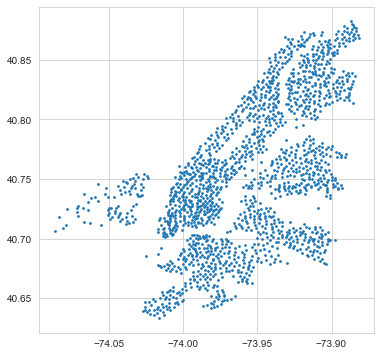

In [106]:

plt.figure(figsize=(6,6))
plt.scatter(coordinates[:,0],coordinates[:,1], s=3)
plt.plot


In [124]:
min_lon = min(coordinates[:,0])
max_lon = max(coordinates[:,0])

min_lat = min(coordinates[:,1])
max_lat = max(coordinates[:,1])

boundary = np.array(list([[min_lon, min_lat],[min_lon,max_lat],[max_lon,max_lat],[max_lon,min_lat],[min_lon, min_lat]]))
boundary

array([[-74.08670068,  40.633385  ],
       [-74.08670068,  40.88226   ],
       [-73.88145   ,  40.88226   ],
       [-73.88145   ,  40.633385  ],
       [-74.08670068,  40.633385  ]])

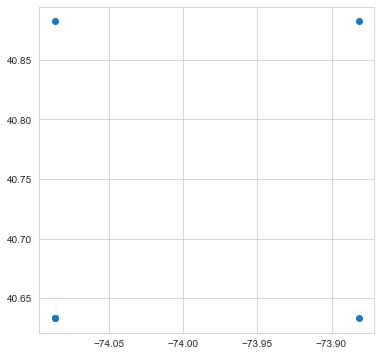

In [126]:
plt.figure(figsize=(6,6))
plt.scatter(boundary[:,0],boundary[:,1])
plt.show()

In [123]:
type(boundary[:,0])

TypeError: list indices must be integers or slices, not tuple

In [127]:
import geopandas

path_to_data = geopandas.datasets.get_path('nybb')
gdf = geopandas.read_file(path_to_data)
gdf

ModuleNotFoundError: No module named 'geopandas'

# [CAC105] - Organizing Data with Python
## Module 2 - Reading Data From Files, Spreadsheets, Websites, and Databases
### - Lesson: Custom Python Input/Output (I/O) [video]

The following cell is copied from video lesson:

In [ ]:
# The purpose of this code is to read a .txt file into a Python dict
# the .txt file is a list of coutry names with population numbers
#
# example:
#   Vietnam 92701100
#   Virgin Islands (U.S.) 102951
#   West Bank and Gaza 4551566

def read_population_data(filename):
    populations = {}
    fileobj = open(filename, 'r')
    for line in fileobj:
        sline = line.split()  # split into words
        population = int(sline[-1]) # last entry in row
        country = ' '.join([w for w in sline[0:-1]]) # all previous entries
        populations[country] = population
    fileobj.close()
    return populations

populations = read_population_data('countries_population_2016.txt')

pops = pd.Series(populations)

def read_population_data_better(filename):
    populations = {}
    with open(filename, 'r') as fileobj:
        for line in fileobj:
            sline = line.split()  # split into words
            population = int(sline[-1]) # last entry in row
            country = ' '.join([w for w in sline[0:-1]]) # all previous entries
            populations[country] = population
    # fileobj is automatically closed at end of block
    return poulations

# [CAC105] - Organizing Data with Python
## _Module 3_ - Filtering, Integrating, and Preparing Data for Analysis
### - Lesson: Integrating and Aggregating Data From Different Streams [video]

The following cell is copied from video lesson:

In [ ]:


import glob

glob.glob('sales_directory/salesdata*.csv')

# Returns:
#    ['salesdata_2000.csv',
#     'salesdata_2001.csv',
#     'salesdata_2002.csv',
#     ...
#     'salesdata_2015.csv',
#     'salesdata_2016.csv',
#     'salesdata_2017.csv']

def read_multiyear_sales_data(directory):
    sales = {}
    # get names of all files matching this name
    salesfiles = glob.glob(directory + '/sales*.csv')
    for filename in salesfiles:
        # parse year from filename
        stop = filename.find('.csv')
        start = stop-4
        year = filename[start:stop]
        # read in dataframe for this year
        df = pd.read_csv(filename, index_col='Month')
        # store dataframe in a dictionary
        sales[year] = df
    return sales

# concatenate the dataframes in the dictionary into one big dictionary
df = pd.concat(sales, axis=0)



# [CAC105] - Organizing Data with Python
### | _Module 3_ - Filterting, Integrating, and Preparing Data for Analysis
| _Lesson:_ Integrating Structurally Different Data Sets Into a Single DataFrame
| The following cell is a testbed for a Codio jupyter notebook assignment:

In [ ]:
sales_and_orders = pd.concat([sales2018, orders2018], keys=('sales','orders'), sort=False, axis=1)

In [130]:
pd.concat?